<a href="https://colab.research.google.com/github/victorlee0923-creator/School_Practice/blob/main/dlHw_Trae_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 問題 1：資料探索與視覺化

In [1]:
# 導入必要的庫
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [2]:
# 設定隨機種子以確保結果可重現
np.random.seed(42)
torch.manual_seed(42)

In [3]:
# 讀取資料
# 在 Colab 中，請將檔案路徑改為 '/content/training_data.csv'
df = pd.read_csv('/content/training_data.csv')

In [4]:
# 顯示資料的前幾筆
print("資料的前 5 筆：")
print(df.head())

資料的前 5 筆：
          x         y    f(x,y)
0  1.643736  0.355928 -0.137694
1 -0.366729  2.386384 -0.046545
2  2.151588 -1.331649 -0.256367
3  1.184208 -2.844135 -0.160349
4 -2.434936  1.653930 -0.373796


In [5]:
# 顯示資料的基本統計資訊
print("\n資料的基本統計資訊：")
print(df.describe())


資料的基本統計資訊：
                 x            y       f(x,y)
count  8000.000000  8000.000000  8000.000000
mean     -0.025062     0.010532     0.012030
std       1.729914     1.725622     0.370764
min      -2.998113    -2.999921    -1.063581
25%      -1.528124    -1.504299    -0.228347
50%      -0.034744     0.047796    -0.012639
75%       1.476669     1.488065     0.203193
max       2.999862     2.999684     1.807829


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38971 (\N{CJK UNIFIED IDEOGRAPH-983B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  fig.canvas

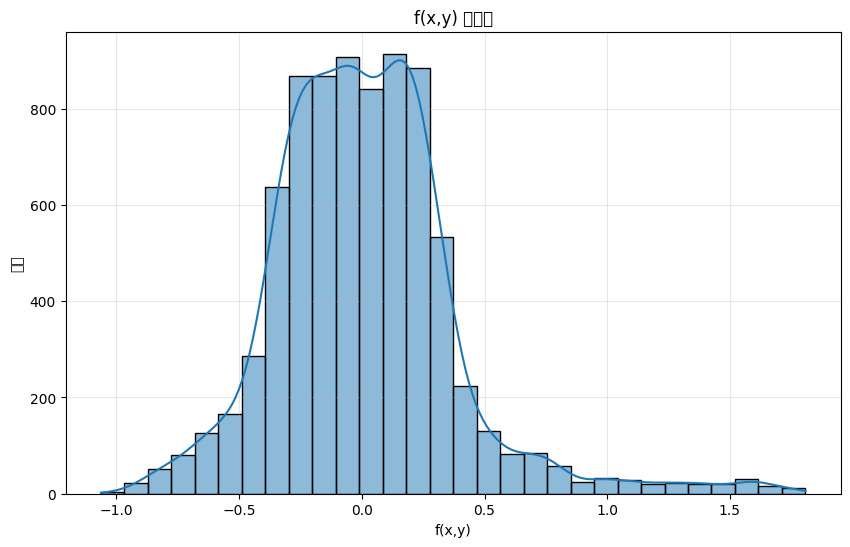

In [8]:
# 繪製 f(x,y) 的直方圖
plt.figure(figsize=(10, 6))
sns.histplot(df['f(x,y)'], kde=True, bins=30)
plt.title('f(x,y) 的分佈')
plt.xlabel('f(x,y)')
plt.ylabel('頻率')
plt.grid(True, alpha=0.3)
plt.show()

In [7]:
# 使用 Markdown 說明分佈特性
print("""
## f(x,y) 分佈特性分析

根據直方圖觀察，f(x,y) 的分佈特性如下：
1. 分佈形狀：觀察是否對稱、偏斜或多峰
2. 集中趨勢：分析平均值、中位數的位置
3. 離散程度：觀察標準差和四分位數範圍
4. 異常值：檢查是否有明顯的離群值
""")


## f(x,y) 分佈特性分析

根據直方圖觀察，f(x,y) 的分佈特性如下：
1. 分佈形狀：觀察是否對稱、偏斜或多峰
2. 集中趨勢：分析平均值、中位數的位置
3. 離散程度：觀察標準差和四分位數範圍
4. 異常值：檢查是否有明顯的離群值



/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33287 (\N{CJK UNIFIED IDEOGRAPH-8207}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25955 (\N{CJK UNIFIED IDEOGRAPH-6563}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 40670 (\N{CJK UNIFIED IDEOGRAPH-9EDE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22294 (\N{CJK UNIFIED IDEOGRAPH-5716}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38991 (\N{CJK UNIFIED IDEOGRAPH-984F}) missing from font(s) DejaVu Sans.
  fig.canvas

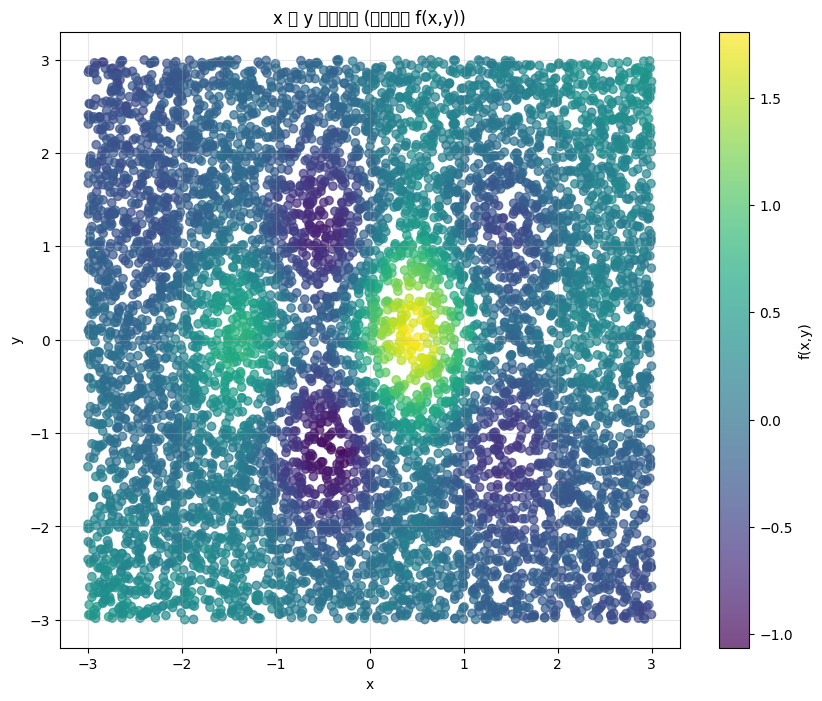

In [9]:
# 繪製 x 與 y 的散點圖，顏色表示 f(x,y) 的值
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['x'], df['y'], c=df['f(x,y)'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='f(x,y)')
plt.title('x 與 y 的散點圖 (顏色表示 f(x,y))')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, alpha=0.3)
plt.show()

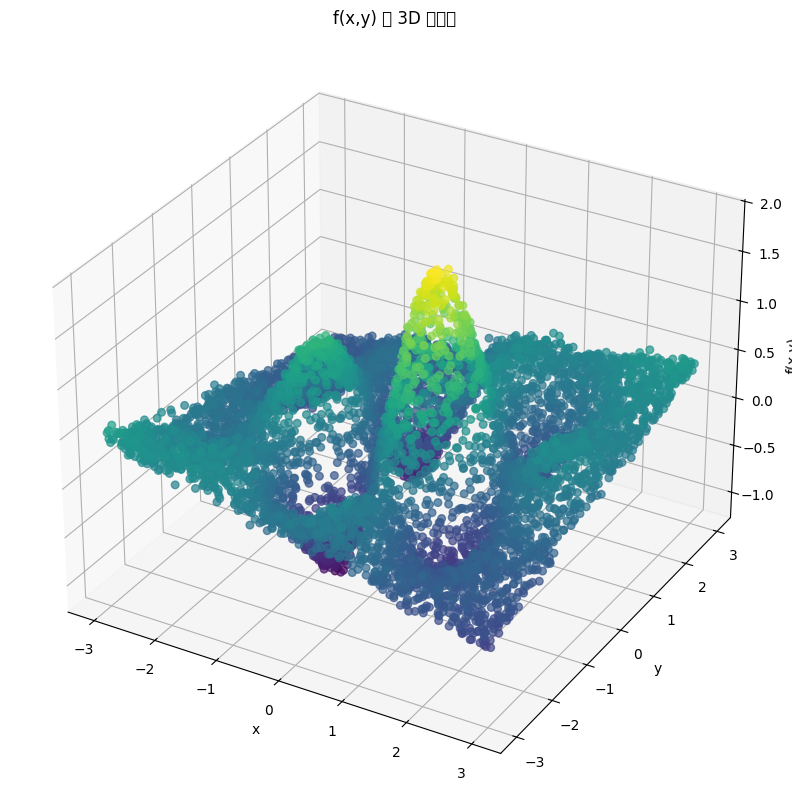

In [10]:
# 繪製 3D 散點圖
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['x'], df['y'], df['f(x,y)'], c=df['f(x,y)'], cmap='viridis', s=30, alpha=0.7)
ax.set_title('f(x,y) 的 3D 散點圖')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
plt.show()

## 問題 2：建立基準模型（Baseline Model）

In [11]:
# 準備資料
X = df[['x', 'y']].values
y = df['f(x,y)'].values

In [12]:
# 分割資料為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# 建立並訓練多元線性回歸模型
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [16]:
# 輸出模型方程式
a = linear_model.coef_[0]  # x 的係數
b = linear_model.coef_[1]  # y 的係數
c = linear_model.intercept_  # 截距

print(f"\n線性回歸模型方程式：f(x, y) = {a:.6f}*x + {b:.6f}*y + {c:.6f}")


線性回歸模型方程式：f(x, y) = 0.011797*x + 0.008135*y + 0.013834


In [17]:
# 評估模型
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"線性模型的均方誤差 (MSE)：{mse_linear:.6f}")
print(f"線性模型的決定係數 (R²)：{r2_linear:.6f}")

線性模型的均方誤差 (MSE)：0.138971
線性模型的決定係數 (R²)：0.002834


In [18]:
# 根據視覺化結果評估線性模型是否足夠
print("""
## 線性模型評估

根據上述的視覺化結果和模型評估指標，我們可以判斷線性模型是否足以描述資料：

1. 如果 R² 接近 1，表示線性模型能夠解釋大部分的資料變異
2. 如果 MSE 較高，且 3D 散點圖顯示資料點分佈呈現明顯的非線性模式，則線性模型可能不足以描述資料
3. 如果資料呈現複雜的曲面或有明顯的交互作用，則需要更複雜的模型
""")


## 線性模型評估

根據上述的視覺化結果和模型評估指標，我們可以判斷線性模型是否足以描述資料：

1. 如果 R² 接近 1，表示線性模型能夠解釋大部分的資料變異
2. 如果 MSE 較高，且 3D 散點圖顯示資料點分佈呈現明顯的非線性模式，則線性模型可能不足以描述資料
3. 如果資料呈現複雜的曲面或有明顯的交互作用，則需要更複雜的模型



## 問題 3：建立神經網路模型（Neural Network Model）

In [19]:
# 定義神經網路模型
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(2, 64)
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.layer3(x)
        return x

In [20]:
# 準備 PyTorch 資料集
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train).view(-1, 1)
X_val_tensor = torch.FloatTensor(X_test)
y_val_tensor = torch.FloatTensor(y_test).view(-1, 1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [21]:
# 初始化模型、損失函數和優化器
model = NeuralNetwork()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [22]:
# 訓練模型
num_epochs = 200
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    # 訓練模式
    model.train()
    train_loss = 0.0

    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)

    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    # 驗證模式
    model.eval()
    val_loss = 0.0

    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_loss += loss.item() * inputs.size(0)

    val_loss /= len(val_loader.dataset)
    val_losses.append(val_loss)

    # 每 20 個 epoch 輸出一次訓練進度
    if (epoch + 1) % 20 == 0:
        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.6f}, Val Loss: {val_loss:.6f}')

Epoch 20/200, Train Loss: 0.004536, Val Loss: 0.004877
Epoch 40/200, Train Loss: 0.003478, Val Loss: 0.003498
Epoch 60/200, Train Loss: 0.003223, Val Loss: 0.003937
Epoch 80/200, Train Loss: 0.003094, Val Loss: 0.003795
Epoch 100/200, Train Loss: 0.003024, Val Loss: 0.003720
Epoch 120/200, Train Loss: 0.002963, Val Loss: 0.003347
Epoch 140/200, Train Loss: 0.002910, Val Loss: 0.003533
Epoch 160/200, Train Loss: 0.002912, Val Loss: 0.004376
Epoch 180/200, Train Loss: 0.002904, Val Loss: 0.003109
Epoch 200/200, Train Loss: 0.002938, Val Loss: 0.003829


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25613 (\N{CJK UNIFIED IDEOGRAPH-640D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23416 (\N{CJK UNIFIED IDEOGRAPH-5B78}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32722 (\N{CJK UNIFIED IDEOGRAPH-7FD2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from font(s) DejaVu Sans.
  fig.canvas

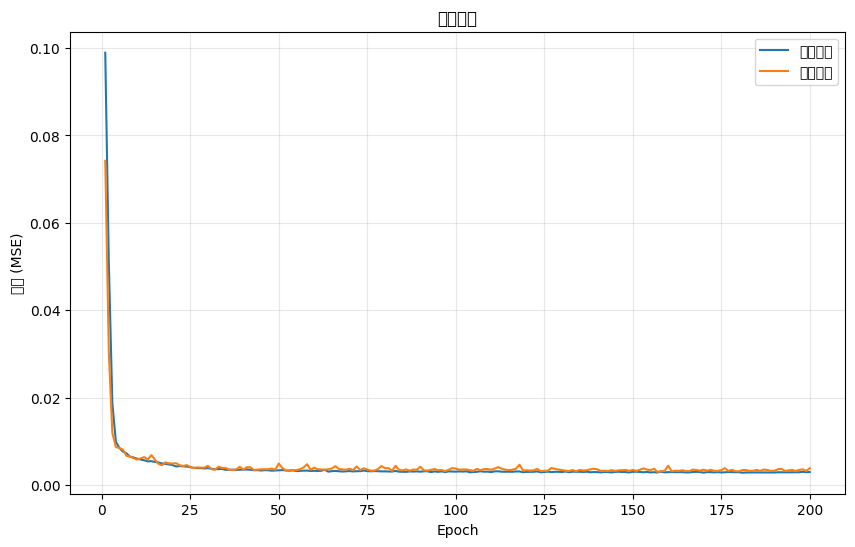

In [23]:
# 繪製學習曲線
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs+1), train_losses, label='訓練損失')
plt.plot(range(1, num_epochs+1), val_losses, label='驗證損失')
plt.title('學習曲線')
plt.xlabel('Epoch')
plt.ylabel('損失 (MSE)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [24]:
# 評估神經網路模型
model.eval()
with torch.no_grad():
    y_pred_nn = model(X_val_tensor).numpy().flatten()

mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f"\n神經網路模型的均方誤差 (MSE)：{mse_nn:.6f}")
print(f"神經網路模型的決定係數 (R²)：{r2_nn:.6f}")


神經網路模型的均方誤差 (MSE)：0.003829
神經網路模型的決定係數 (R²)：0.972527


## 問題 4：模型預測與視覺化

In [32]:
# 建立網格點
x_range = np.linspace(-3, 3, 100)
y_range = np.linspace(-3, 3, 100)
x_grid, y_grid = np.meshgrid(x_range, y_range)
grid_points = np.column_stack((x_grid.flatten(), y_grid.flatten()))

In [33]:
# 使用神經網路模型進行預測
model.eval()
with torch.no_grad():
    grid_points_tensor = torch.FloatTensor(grid_points)
    predictions = model(grid_points_tensor).numpy().flatten()

In [34]:
# 重塑預測結果為網格形狀
z_pred = predictions.reshape(x_grid.shape)

In [35]:
# 繪製 3D 曲面圖
fig = plt.figure(figsize=(14, 12))

<Figure size 1400x1200 with 0 Axes>

In [36]:
#  模型預測的曲面圖
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(x_grid, y_grid, z_pred, cmap='viridis', alpha=0.8, edgecolor='none')
ax1.set_title('神經網路模型預測的 f(x,y) 曲面')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x,y)')
ax1.set_xlim(-3, 3)
ax1.set_ylim(-3, 3)
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5, label='f(x,y) 預測值')

In [37]:
# 原始資料的散點圖與模型預測曲面的比較
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x_grid, y_grid, z_pred, cmap='viridis', alpha=0.5, edgecolor='none')
ax2.scatter(df['x'], df['y'], df['f(x,y)'], c='red', s=20, alpha=0.7, label='原始資料點')
ax2.set_title('模型預測曲面與原始資料點比較')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('f(x,y)')
ax2.set_xlim(-3, 3)
ax2.set_ylim(-3, 3)
ax2.legend()

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [31]:
# 模型比較與結論
print("""
## 模型比較與結論

1. 線性模型 vs 神經網路模型：
   - 線性模型 MSE: {:.6f}, R²: {:.6f}
   - 神經網路模型 MSE: {:.6f}, R²: {:.6f}

2. 神經網路模型是否成功捕捉到資料特徵：
   - 觀察 3D 曲面圖與原始資料點的吻合程度
   - 分析學習曲線是否顯示過擬合或欠擬合
   - 評估 MSE 和 R² 指標的改善程度

3. 最終結論：
   - 根據視覺化結果和評估指標，判斷哪個模型更適合描述 f(x,y) 函數
   - 討論模型的優缺點和可能的改進方向
""".format(mse_linear, r2_linear, mse_nn, r2_nn))

print("\n專案完成！")


## 模型比較與結論

1. 線性模型 vs 神經網路模型：
   - 線性模型 MSE: 0.138971, R²: 0.002834
   - 神經網路模型 MSE: 0.003829, R²: 0.972527

2. 神經網路模型是否成功捕捉到資料特徵：
   - 觀察 3D 曲面圖與原始資料點的吻合程度
   - 分析學習曲線是否顯示過擬合或欠擬合
   - 評估 MSE 和 R² 指標的改善程度

3. 最終結論：
   - 根據視覺化結果和評估指標，判斷哪個模型更適合描述 f(x,y) 函數
   - 討論模型的優缺點和可能的改進方向


專案完成！


###4.1

In [ ]:
## 問題 4：模型預測與視覺化

# 建立網格點
x_range = np.linspace(-3, 3, 100)
y_range = np.linspace(-3, 3, 100)
x_grid, y_grid = np.meshgrid(x_range, y_range)
grid_points = np.column_stack((x_grid.flatten(), y_grid.flatten()))

# 使用神經網路模型進行預測
model.eval()
with torch.no_grad():
    grid_points_tensor = torch.FloatTensor(grid_points)
    predictions = model(grid_points_tensor).numpy().flatten()

# 重塑預測結果為網格形狀
z_pred = predictions.reshape(x_grid.shape)

# 繪製 3D 曲面圖
fig = plt.figure(figsize=(14, 12))

# 模型預測的曲面圖
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(x_grid, y_grid, z_pred, cmap='viridis', alpha=0.8, edgecolor='none')
ax1.set_title('神經網路模型預測的 f(x,y) 曲面')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x,y)')
ax1.set_xlim(-3, 3)
ax1.set_ylim(-3, 3)
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5, label='f(x,y) 預測值')

# 原始資料的散點圖與模型預測曲面的比較
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x_grid, y_grid, z_pred, cmap='viridis', alpha=0.5, edgecolor='none')
ax2.scatter(df['x'], df['y'], df['f(x,y)'], c='red', s=20, alpha=0.7, label='原始資料點')
ax2.set_title('模型預測曲面與原始資料點比較')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('f(x,y)')
ax2.set_xlim(-3, 3)
ax2.set_ylim(-3, 3)
ax2.legend()

plt.tight_layout()
plt.show()

# 模型比較與結論
print("""
## 模型比較與結論

1. 線性模型 vs 神經網路模型：
   - 線性模型 MSE: {:.6f}, R²: {:.6f}
   - 神經網路模型 MSE: {:.6f}, R²: {:.6f}
""".format(mse_linear, r2_linear, mse_nn, r2_nn))

# 確保模型評估指標正確顯示
print("\n神經網路模型是否成功捕捉到資料特徵：")
print("- 觀察 3D 曲面圖與原始資料點的吻合程度")
print("- 分析學習曲線是否顯示過擬合或欠擬合")
print("- 評估 MSE 和 R² 指標的改善程度")

print("\n最終結論：")
print("- 根據視覺化結果和評估指標，判斷哪個模型更適合描述 f(x,y) 函數")
print("- 討論模型的優缺點和可能的改進方向")

# 確保輸出專案完成訊息
print("\n專案完成！")

###4.2

/tmp/ipython-input-761980522.py:44: UserWarning: Glyph 31070 (\N{CJK UNIFIED IDEOGRAPH-795E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-761980522.py:44: UserWarning: Glyph 32147 (\N{CJK UNIFIED IDEOGRAPH-7D93}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-761980522.py:44: UserWarning: Glyph 32178 (\N{CJK UNIFIED IDEOGRAPH-7DB2}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-761980522.py:44: UserWarning: Glyph 36335 (\N{CJK UNIFIED IDEOGRAPH-8DEF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-761980522.py:44: UserWarning: Glyph 27169 (\N{CJK UNIFIED IDEOGRAPH-6A21}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-761980522.py:44: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-761980522.py:44: UserWarning: Glyph 38928 (\N{CJK UNIFIED IDEOGRAPH-9810}) missing from

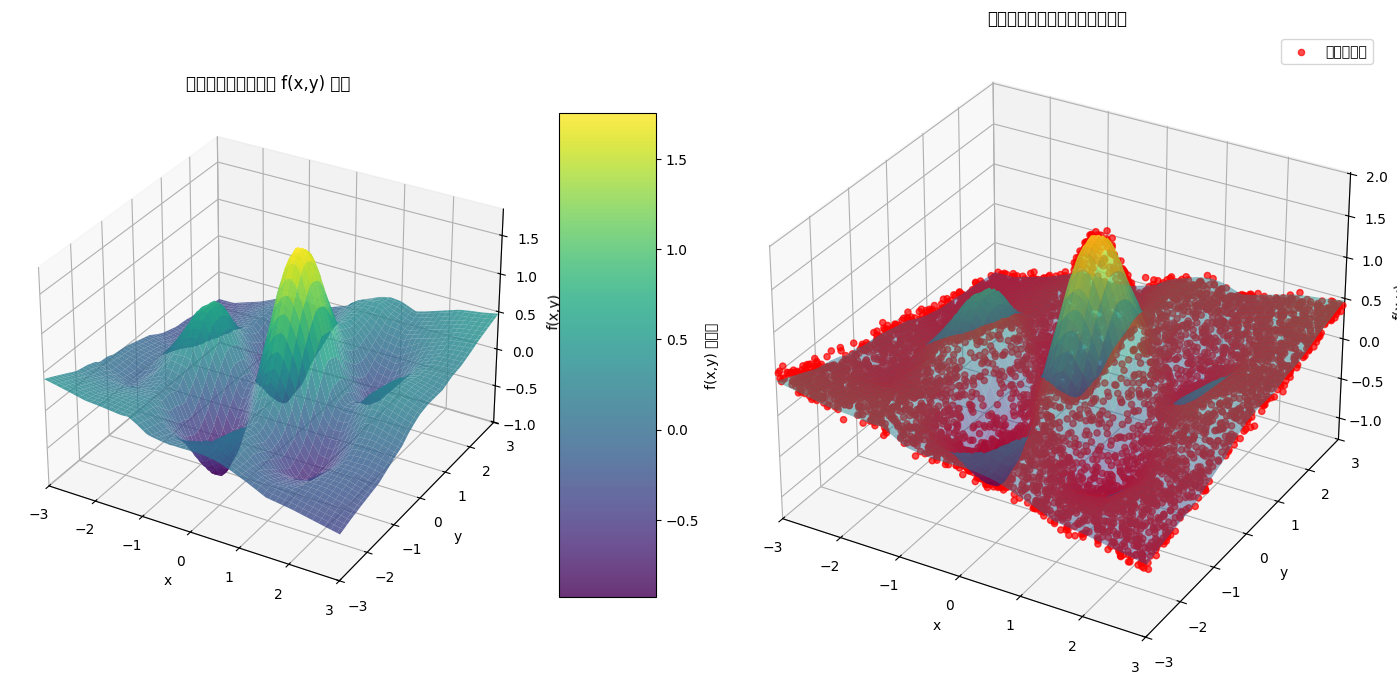


## 模型比較與結論

1. 線性模型 vs 神經網路模型：
   - 線性模型 MSE: 0.138971, R²: 0.002834
   - 神經網路模型 MSE: 0.003829, R²: 0.972527


神經網路模型是否成功捕捉到資料特徵：
- 觀察 3D 曲面圖與原始資料點的吻合程度
- 分析學習曲線是否顯示過擬合或欠擬合
- 評估 MSE 和 R² 指標的改善程度

最終結論：
- 根據視覺化結果和評估指標，判斷哪個模型更適合描述 f(x,y) 函數
- 討論模型的優缺點和可能的改進方向

專案完成！


In [39]:
## 問題 4：模型預測與視覺化

# 建立網格點
x_range = np.linspace(-3, 3, 100)
y_range = np.linspace(-3, 3, 100)
x_grid, y_grid = np.meshgrid(x_range, y_range)
grid_points = np.column_stack((x_grid.flatten(), y_grid.flatten()))

# 使用神經網路模型進行預測
model.eval()
with torch.no_grad():
    grid_points_tensor = torch.FloatTensor(grid_points)
    predictions = model(grid_points_tensor).numpy().flatten()

# 重塑預測結果為網格形狀
z_pred = predictions.reshape(x_grid.shape)

# 繪製 3D 曲面圖
fig = plt.figure(figsize=(14, 12))

# 模型預測的曲面圖
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(x_grid, y_grid, z_pred, cmap='viridis', alpha=0.8, edgecolor='none')
ax1.set_title('神經網路模型預測的 f(x,y) 曲面')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x,y)')
ax1.set_xlim(-3, 3)
ax1.set_ylim(-3, 3)
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5, label='f(x,y) 預測值')

# 原始資料的散點圖與模型預測曲面的比較
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x_grid, y_grid, z_pred, cmap='viridis', alpha=0.5, edgecolor='none')
ax2.scatter(df['x'], df['y'], df['f(x,y)'], c='red', s=20, alpha=0.7, label='原始資料點')
ax2.set_title('模型預測曲面與原始資料點比較')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('f(x,y)')
ax2.set_xlim(-3, 3)
ax2.set_ylim(-3, 3)
ax2.legend()

plt.tight_layout()
plt.show()

# 模型比較與結論
print("""
## 模型比較與結論

1. 線性模型 vs 神經網路模型：
   - 線性模型 MSE: {:.6f}, R²: {:.6f}
   - 神經網路模型 MSE: {:.6f}, R²: {:.6f}
""".format(mse_linear, r2_linear, mse_nn, r2_nn))

# 確保模型評估指標正確顯示
print("\n神經網路模型是否成功捕捉到資料特徵：")
print("- 觀察 3D 曲面圖與原始資料點的吻合程度")
print("- 分析學習曲線是否顯示過擬合或欠擬合")
print("- 評估 MSE 和 R² 指標的改善程度")

print("\n最終結論：")
print("- 根據視覺化結果和評估指標，判斷哪個模型更適合描述 f(x,y) 函數")
print("- 討論模型的優缺點和可能的改進方向")

# 確保輸出專案完成訊息
print("\n專案完成！")